In [4]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.listdir("../Data")
### Load data
path_to_file = Path().resolve().parent / "Data" / "datos edgar.xlsx"
data = pd.read_excel(path_to_file, header=1).dropna(how="all").drop(columns="espTa2O5")

data_by_group = ( 
    data
    .query("Lambda >= 580 and Lambda <= 620")
    [['espAl2O3', 'espSiO2', 'Lambda', 'R (1)']]
    .assign(
        grupo = lambda k: k
            .groupby(["espAl2O3", "espSiO2"])
            .ngroup(),
    )
    .reset_index(drop=True)
)

In [8]:
data_by_group.columns

Index(['espAl2O3', 'espSiO2', 'Lambda', 'R (1)', 'grupo'], dtype='object')

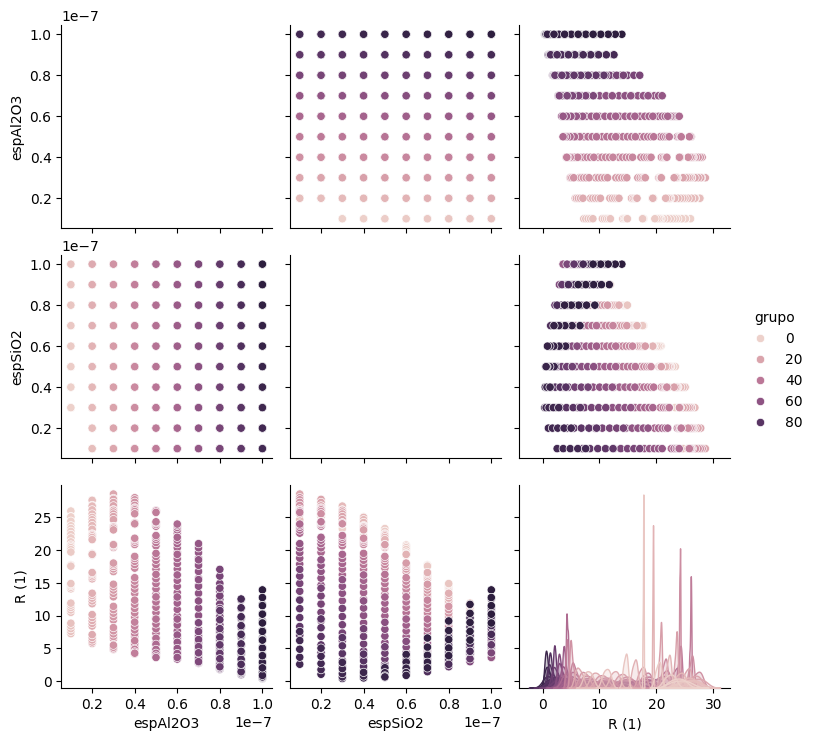

In [9]:
data_by_group.pipe(sns.pairplot, hue="grupo", vars=['espAl2O3', 'espSiO2', "R (1)"])

In [ ]:
0.4 - 0.6